# 1. 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
>### <B>컬럼</B>
> ID : 확진자 ID. 발생순서대로 1씩증가하는 값       
> 확진일: 확진 날짜       
> 자치구: 확진 결과를 받은 지역구.       
> 여행력: 해외유입의 경우 국가명        
> 접촉력: 감염된 경로.        
> 현재상태: 퇴원, 사망, NA: 치료중      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv', encoding = 'utf-8')
df

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원


# 1. DataFrame 기본정보 조회

In [3]:
df.shape
df.info()
df.isna().sum()
df.describe(include = 'object')
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30061 non-null  int64 
 1   확진일     30061 non-null  object
 2   자치구     30061 non-null  object
 3   여행력     976 non-null    object
 4   접촉력     30061 non-null  object
 5   현재상태    27143 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


,ID,확진일,자치구,여행력,접촉력,현재상태
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원
30060,1,2020-01-24,강서구,중국,해외유입,퇴원


- info()를 통해 알수 있는 것은 'ID'를 제외하고 나머지 컬럼들이 object타입임을 알수 있다. 
- 확진일은 날짜임에도 불구하고 object 문자열로 되어 있으니 이부분은 데이터타입을 변환해줘야한다. 
- 여행력, 현재상태의 갯수를 보면 30061보다 갯수가 작다. isna().sum()을 통해 결측치가 어느정도 확인해야하고 수집과정에서 누락이 된것인지 확인해봐야한다. 의미가 있는 결측치 인지도 확이해봐야한다. 

## 1.1 범주형 컬럼들의 고유값들 조회

In [4]:
df['자치구'].unique()
df['여행력'].unique()
df['접촉력'].unique() 
df['현재상태'].unique()

array(['사망', nan, '퇴원'], dtype=object)

- 범주형 컬럼들의 고유값을 조회할 때 unique()를 사용해도 되고 해당 고유값의 갯수를 확인해보고 싶으면 value_counts()를 사용해도 된다. 
- 뒤에 value_counts()를 사용해서 문제를 푸니 여기서는 unique()를 사용하자. 


# 2. 확진일 확진자수 정보 조회

## 2.1 확진일의 빈도수

In [5]:
df['확진일'].value_counts()

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-05-17      1
2020-05-01      1
2020-04-18      1
2020-02-02      1
2020-04-19      1
Name: 확진일, Length: 384, dtype: int64

- 확진일이 object타입 문자열로 되어 있기 대문에 날짜형태로 변환해주는 것이 좋다. 왜냐하면 2021-01-20, 2021-02-10, 2021-10-5 날짜가 문자열로 저장되어 있을 경우 문자열 정렬로 인해 1월 10월 2월 순으로 정렬이 되기때문이다. 
- 따라서 날짜타입으로 변환하여 관리하는 것이 좋다. 

> ### </b>datetime으로 변환<b/>
> <b>[방법1] 기존의 컬럼을 to_datetime으로 변환하기 </b>
> - to_datetiem(df['컬럼'], format)
> - format : %Y:년도(4자리), %m:월, %d:일, %H:시간, %M:분, %S: 초 (2자리)

> <b>[방법2] read_csv()로 읽을때 변환하기</b>
> - read_csv('', parse_dates, date_parser)
> - parse_dates=['datetime 타입으로 읽을 컬럼', ...]
> - date_parser=변환함수
>   - strftime(): datetime을 str으로 (to_char())
>   - strptime(): str을 datetime으로 (to_date())

## 2.2 확진일을 datetime으로 변환

In [6]:
# 방법1. 기존의 컬럼을 to_datetime으로 변환하기
df['확진일'] = pd.to_datetime(df['확진일']) # '-'로 년-월-일 구별이 되어 있으니 포맷을 하지 않아도 데이트타입으로 변환이 된다.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# 방법2. csv파일 로드 시 '확진일'컬럼을 datetime으로 변환
from datetime import datetime
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv',
                parse_dates = ['확진일'],
                date_parser = lambda x : datetime.strptime(x,'%Y-%m-%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


## 2.3 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [8]:
calendar = df['확진일'].dt.isocalendar()

df['년'] = calendar['year']
df['월'] = df['확진일'].dt.month # 아쉽게도 isocalendar에는 month가 없다. 
df['주'] = calendar['week']
df['요일'] = calendar['day']

df.head(5)

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,7
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,7
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,7
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,7
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,7


- 처음에는 dt.year(년), dt.month(월), dt.week(주), dt.dayofweek(요일) 를 통해서 날짜를 분리하였다. 
- 그러나 뒤에 문제를 풀다보면 2021년 53주가 나오는 점이였다. 
- 우리가 받은 csv자료는 2021년 3월까지의 자료로 2021년 53주가 나올 구조가 아니였음에도 2021년 53주차가 나왔기 때문이다. 
- 왜 나오게 되었는지 확인을 해 보니 2021년 12월 마지막주차에서 1월로 넘어가는 그 주를 2021년 53주차로 계산했기 때문이다.
- 이부분은 isocalendar()를 통해서 이를 해결하였다. 
- 아쉽게도 month는 isocalendar()로 분리할수 없어서 dt.month를 사용하였다. 

## 2.4 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week : 월요일(0) - 일요일(6)
    - dt.isocalendar()['week'] : 월요일(1) - 일요일(7)

In [9]:
def change_week_str(x):
    if x == 1 :
        return '월'
    if x == 2 :
        return '화'
    if x == 3 :
        return '수'
    if x == 4 :
        return '목'
    if x == 5 :
        return '금'
    if x == 6 :
        return '토'
    if x == 7 :
        return '일'
    
df['요일'] = df['요일'].apply(change_week_str)
df.head()

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일


###  Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 **<u>메모리를 절약**</u> 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 **<u>논리적 순서로 정렬</u>**되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.to_categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순성형 여부 설정

## 2.5 요일을 Categorical Type으로 변환

In [10]:
df['요일'] = pd.Categorical(df['요일'], categories = list("월화수목금토일"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
 6   년       30061 non-null  UInt32        
 7   월       30061 non-null  int64         
 8   주       30061 non-null  UInt32        
 9   요일      30061 non-null  category      
dtypes: UInt32(2), category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 1.9+ MB


- 문자열이기때문에 가시적으로 보여지는 값은 바뀐것 처럼 보이지 않지만 df.info()를 통해 내부적으로 category 타입으로 변환이 된 점을 알 수 있다. 

## 2.6 확진자 수 변화 추이 시각화

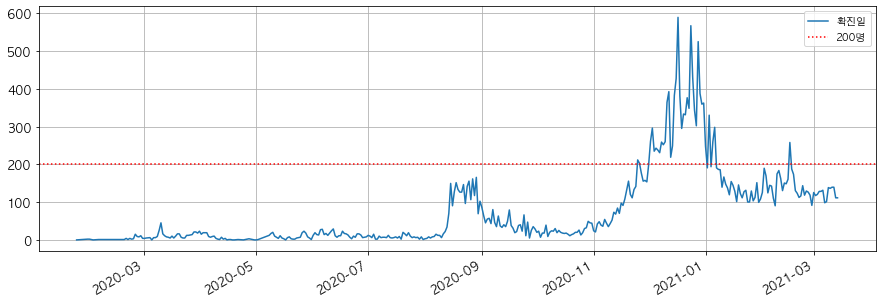

In [11]:
일자별_확진자수 = df['확진일'].value_counts()
일자별_확진자수.plot(kind = 'line', figsize = (15,5))
plt.axhline(y = 200, color = 'r', linestyle = ':', label = '200명')

plt.legend()
plt.grid(True)
plt.show()

- 날짜를 데이트 타입으로 변환했기 때문에 날짜순으로 잘 나오고 있다.
- 중간에 급변하는 부분은  왜 저렇게 변화 했는지 등 알아보기 위해서 추가적으로 뽑아서 보는 것도 좋다. 

## 2.7 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

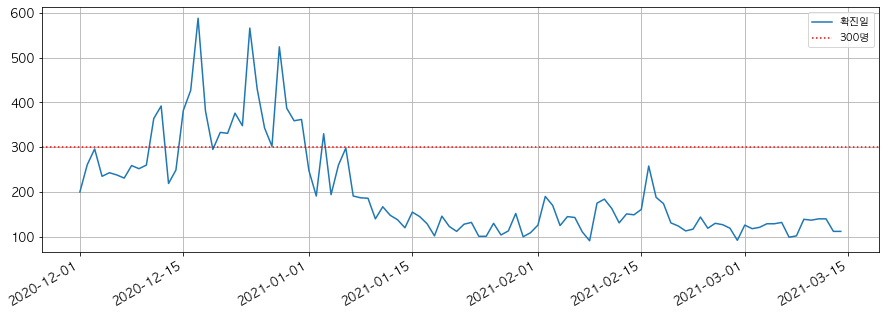

In [12]:
일자별확진자수_12월이후 = df.loc[df['확진일'] >= '2020-12-01', '확진일'].value_counts()
일자별확진자수_12월이후.plot(kind = 'line', figsize = (15,5))
plt.grid(True)
plt.axhline(300, color = 'r', linestyle = ':', label = '300명')
plt.legend()
plt.show()

## 2.8 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

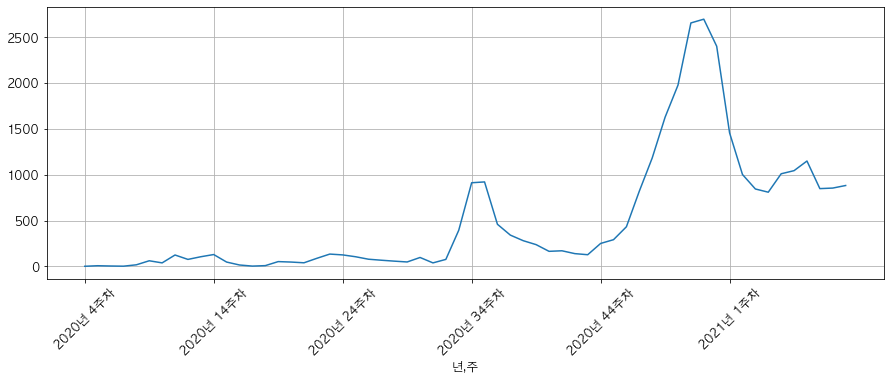

In [13]:
년도_주_별확진자수 = df.groupby(['년','주'])['ID'].count()
년도_주_별확진자수.plot(kind = 'line', figsize = (15,5))
plt.xticks(ticks = range(0, 년도_주_별확진자수.size, 10), # 틱과 라벨 갯수 맞추기 위해서 10  
            labels = [f'{year}년 {week}주차' for i, (year, week) in enumerate(년도_주_별확진자수.index) if i % 10 == 0], # 10주차로 나눠서 
            rotation = 45)
plt.grid()
plt.show()

## 2.9 년-월 단위  확진자수 조회 및 시각화

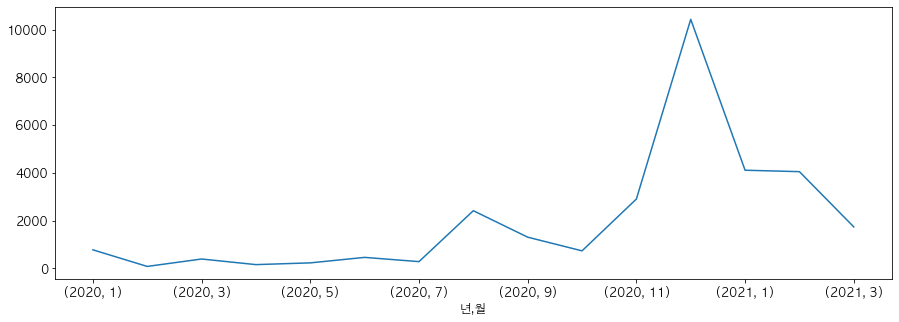

In [14]:
년_월별_확진자수 = df.groupby(['년','월'])['ID'].count()
년_월별_확진자수.plot(kind = 'line', figsize = (15,5))
plt.show()

## 2.10 월-요일별 확진자수 조회 및 시각화

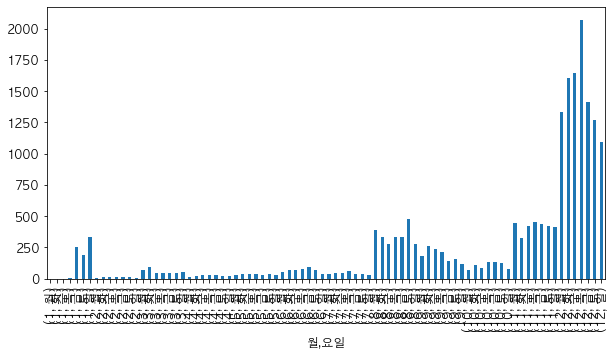

In [15]:
월_요일_확진자수 = df.groupby(['월','요일'])['ID'].count()

# 2020, 2021 년도를 구분해서 월-요일을 확인해보자. 
월_요일_확진자수_2020 = df[df['년'] == 2020].groupby(['월','요일'])['ID'].count()

월_요일_확진자수_2020.plot(kind = 'bar', figsize = (10,5))
plt.show()

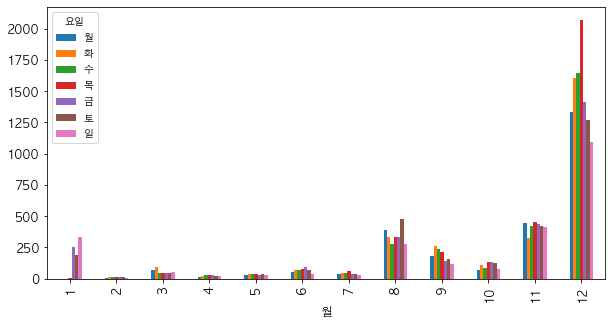

In [16]:
# 월_요일별 피봇테이블 사용 
월_요일별_확진자수2 = df[df['년'] == 2020].pivot_table(values = 'ID',
                                             index = '월',
                                             columns = '요일',
                                             aggfunc = 'count',
                                             fill_value = 0) # 결측치 0으로 처리
월_요일별_확진자수2 # 요일이 금목수월 이렇게 나오니 카테고리컬을 적용해보자 
월_요일별_확진자수2.plot(kind = 'bar', figsize = (10,5))
plt.show()

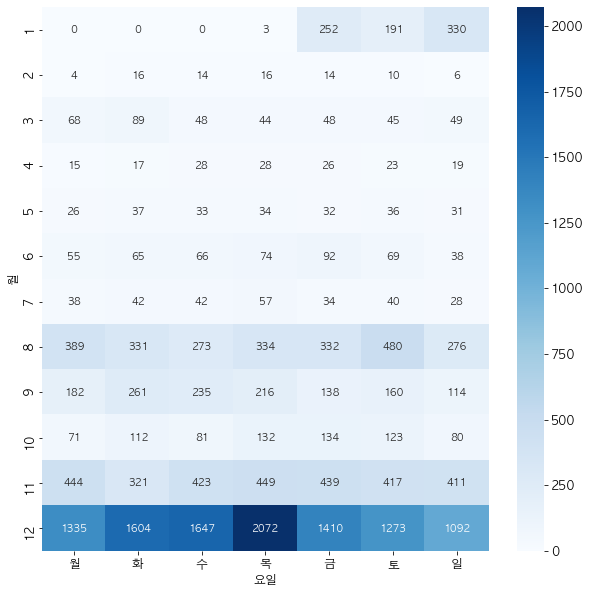

In [17]:
# 히트맵으로도 가능 
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(월_요일별_확진자수2, cmap = 'Blues', annot = True, fmt ='d') # 'd' error : 왜? 피봇테이블에 0 자리 결측치 때문
plt.show()

- groupby를 통해 그려진 그래프는 월과 요일이 구별이 잘 안된다. 이럴경우는 피봇테이블을 이용하는 것이 그래프 상으로 보기 좋다. 

# 3. 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 3.1 일별 누적 확진자수 조회

In [18]:
df['확진일'].value_counts()
df['확진일'].value_counts().sort_index()
df['확진일'].value_counts().sort_index().cumsum()
cumsum_df = df['확진일'].value_counts().sort_index().cumsum().to_frame() #데이터프레임으로 변환한다.
cumsum_df.columns = ['누적확진자수']
cumsum_df

,누적확진자수
2020-01-24,1
2020-01-30,4
2020-01-31,7
2020-02-02,8
2020-02-05,10
...,...
2021-03-10,29557
2021-03-11,29697
2021-03-12,29837
2021-03-13,29949


## 3.2 누적확진자수 파생변수 생성

In [19]:
cumsum_df['확진자수'] = df['확진일'].value_counts().sort_index()
cumsum_df.head()

,누적확진자수,확진자수
2020-01-24,1,1
2020-01-30,4,3
2020-01-31,7,3
2020-02-02,8,1
2020-02-05,10,2


## 3.3 누적 확진자수 선그래프

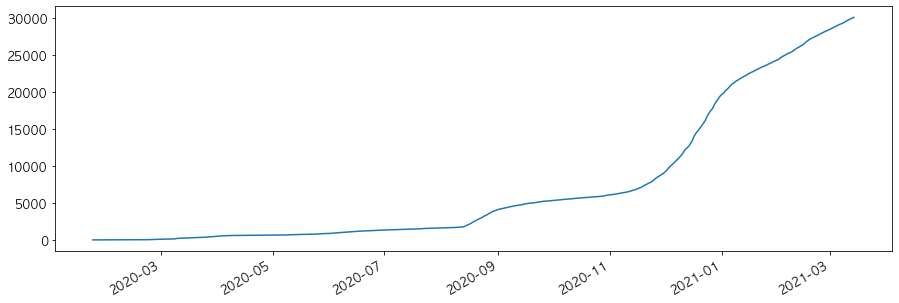

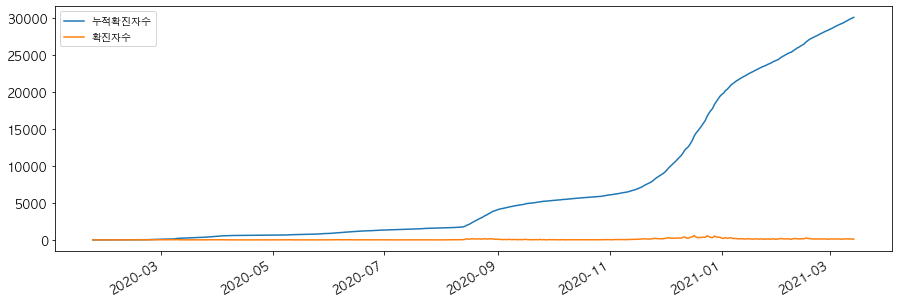

In [20]:
cumsum_df['누적확진자수'].plot(kind = 'line', figsize = (15,5))
cumsum_df.plot(kind ='line', figsize = (15,5)) # 그래프가 2개 그려진다. 그러나 노란색이 변화가 거의 없다 보니 트윈엑스 통해서 표현가능
plt.show()

# 4. 자치구 기준 확진자 조회

## 4.1 자치구별 확진자수 조회

In [21]:
자치구별_확진자수 = df['자치구'].value_counts()
자치구별_확진자수

기타      2000
강서구     1704
송파구     1658
타시도     1413
관악구     1408
강남구     1376
노원구     1322
성북구     1298
은평구     1262
중랑구     1250
동작구     1238
서초구     1148
양천구     1144
영등포구    1122
구로구     1094
동대문구    1087
강동구     1036
마포구      990
도봉구      954
광진구      876
용산구      815
서대문구     786
강북구      785
성동구      763
종로구      579
금천구      478
중구       475
Name: 자치구, dtype: int64

## 4.2 자치구별 확진자수 시각화

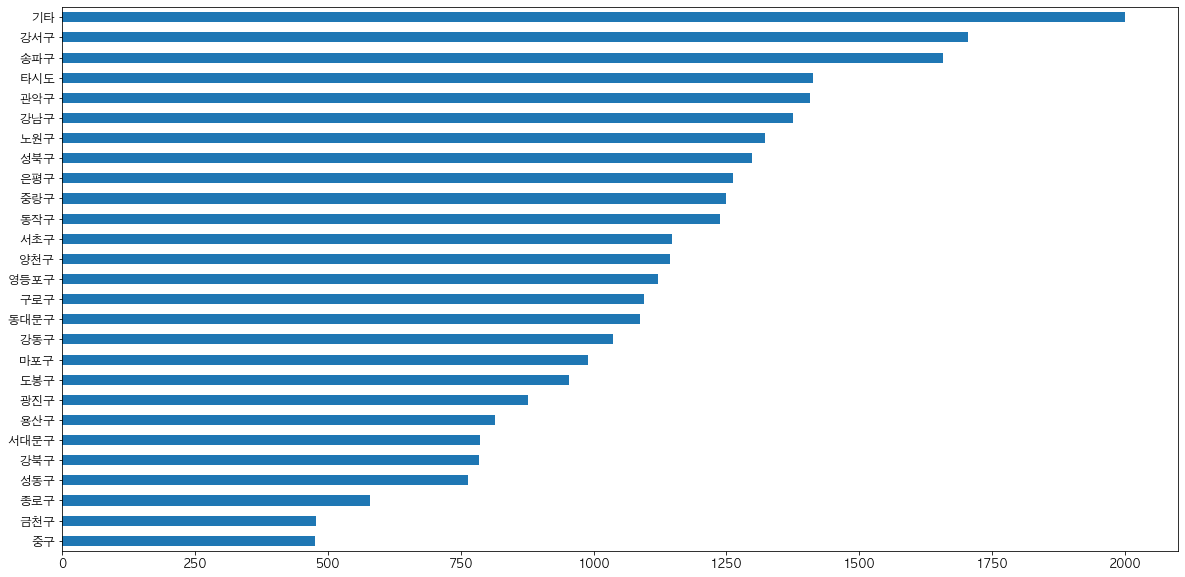

In [22]:
자치구별_확진자수.sort_values().plot(kind = 'barh',figsize = (20,10)) 
plt.show()

- 컬럼이 많으면 bar보다 barh가 더 낫다. 
- 화면상 큰것 부터 보기위해 정렬해주자. 

# 5. 접촉력 관련 확진자 조회

## 5.1 집단 감염자를 낸 접촉력 상위 15개 조회

In [23]:
df['접촉력'].value_counts().head(15)

기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 접촉력, dtype: int64

## 5.2 집단 감염자를 낸 접촉력 하위 15개 조회

In [24]:
df['접촉력'].value_counts().tail(15)

영등포 소재 의료기관 관련              1
서초구 LG 유플러스                 1
관악구 김혜근의원                   1
신 천 지                       1
ㅋㅋ트랜드                       1
부산시 방문주사 관련                 1
삼성물산                        1
타시도 확진자 접촉 (수원 베이비시터 관련)    1
중구 소재 콜센터(다은컨설팅)            1
역조실 일보 반영                   1
구로구소재 고등학교 관련               1
타시도 확진자 접촉 (강원 강릉시 지인모임)    1
안양 목회자 관련                   1
위에화엔터테인먼트                   1
중구 통일상가                     1
Name: 접촉력, dtype: int64

## 5.3 접촉력 상위 15개만 시각화

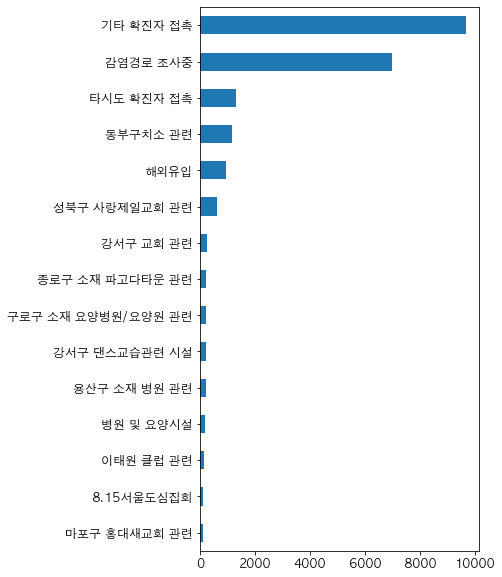

In [25]:
df['접촉력'].value_counts().head(15).sort_values().plot(kind = 'barh', figsize = (5, 10))
plt.show()

## 5.4 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

In [26]:
idx = df['접촉력'].value_counts().head(15).index
idx

df.loc[df['접촉력'].isin(idx)].pivot_table(values = 'ID', 
                                        index = '접촉력',
                                       columns = '월',
                                       aggfunc = 'count',
                                       fill_value = 0)

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930
마포구 홍대새교회 관련,0,0,0,0,0,0,0,0,0,0,96,13
병원 및 요양시설,57,82,31,0,0,0,0,0,0,0,0,0


# 6. 현재상태 관련조회

## 6.1 사망자 수/비율 조회

In [27]:
df['현재상태'].value_counts()['사망'] # 사망자수 :4 05
df['현재상태'].value_counts()['퇴원'] # 퇴원자수 :26738
(df['현재상태'] == '사망').mean() # 0.013472605701739795
(df['현재상태'] == '퇴원').mean() # 0.8894581018595522

0.8894581018595522

## 6.2 퇴원, 사망자, 치료중(NA)의 비율을 시각화

In [28]:
df['현재상태'].value_counts(dropna = False)

# 치료중으로 표현하고 싶다면
df['현재상태'].fillna('치료중').value_counts()

퇴원     26738
치료중     2918
사망       405
Name: 현재상태, dtype: int64

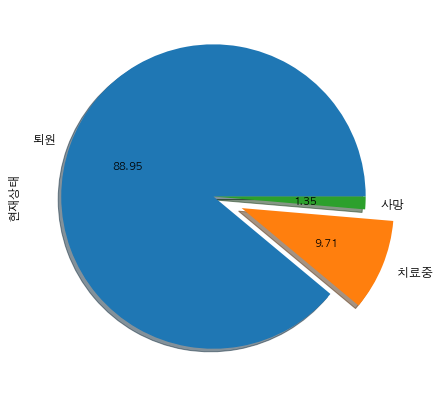

In [33]:
df['현재상태'].fillna('치료중').value_counts().plot(
    kind = 'pie',
    autopct = '%.2f',
    figsize = (7,7),
    shadow = True,
    explode = [0, 0.2, 0] # 치료중을 강조해보자 
)
plt.show()

> <b> 느낌점</b> 
> - 판다스 연습을 많이 해야한다. 아직 개념이 잘 안 잡혀 있다보니 쉽게 해결가능한 것들이 어렵게 풀려고 했던 부분들이 많았다. 
> - 결측치 처리 놓칠수 있는 부분이니 꼼꼼하게 확인하는 것이 좋을 듯하다. 
> - groupby와 pivot의 차이 구분 잘해서 좀 더 보기 쉬운 그래프로 표현하는 것이 좋다. 
> - 누적 조회가 아직 익숙치 않다.
> - 카테고리컬과 날짜 변환하는 부분도 유용하게 사용할 것같다.